# Breast Cancer prediction Using Machine Learning

In [34]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
# Extracting Dataset using uci Machine learning Repository
url='https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'

In [36]:
# Reading data
df = pd.read_csv(url)

In [37]:
df

,1000025,5,1,1.1,1.2,2,1.3,3,1.4,1.5,2.1
0,1002945,5,4,4,5,7,10,3,2,1,2
1,1015425,3,1,1,1,2,2,3,1,1,2
2,1016277,6,8,8,1,3,4,3,7,1,2
3,1017023,4,1,1,3,2,1,3,1,1,2
4,1017122,8,10,10,8,7,10,9,7,1,4
...,...,...,...,...,...,...,...,...,...,...,...
693,776715,3,1,1,1,3,2,1,1,1,2
694,841769,2,1,1,1,2,1,1,1,1,2
695,888820,5,10,10,3,7,3,8,10,2,4
696,897471,4,8,6,4,3,4,10,6,1,4


In [38]:
# Feature Selection
df.columns=["code-number",
            "ClumpThick",
            "Unicell",
            "Unicellshape",
            "Marg-ad",
            "Sin-Empi-cell-size",
            "Bare-Nucl",
            "Blnd-Chrom",
            "Nor-Nucl",
            "Mito",
            "class"]

# Converting into csv file
df.to_csv("data.csv",index=None,header=True)

In [39]:
df.isnull().sum()

code-number           0
ClumpThick            0
Unicell               0
Unicellshape          0
Marg-ad               0
Sin-Empi-cell-size    0
Bare-Nucl             0
Blnd-Chrom            0
Nor-Nucl              0
Mito                  0
class                 0
dtype: int64

In [40]:
# Preprocessing dataset

#bc['Bare-Nucl'] = bc['Bare-Nucl'].replace(['?'],[np.nan])

# bc.iloc[[22]]

df = pd.read_csv('data.csv',  na_values = "?")

# df.iloc[[22]]

df.head(30)

,code-number,ClumpThick,Unicell,Unicellshape,Marg-ad,Sin-Empi-cell-size,Bare-Nucl,Blnd-Chrom,Nor-Nucl,Mito,class
0,1002945,5,4,4,5,7,10.0,3,2,1,2
1,1015425,3,1,1,1,2,2.0,3,1,1,2
2,1016277,6,8,8,1,3,4.0,3,7,1,2
3,1017023,4,1,1,3,2,1.0,3,1,1,2
4,1017122,8,10,10,8,7,10.0,9,7,1,4
5,1018099,1,1,1,1,2,10.0,3,1,1,2
6,1018561,2,1,2,1,2,1.0,3,1,1,2
7,1033078,2,1,1,1,2,1.0,1,1,5,2
8,1033078,4,2,1,1,2,1.0,2,1,1,2
9,1035283,1,1,1,1,1,1.0,3,1,1,2


In [46]:
# finding missing values
df.isnull().sum()

code-number            0
ClumpThick             0
Unicell                0
Unicellshape           0
Marg-ad                0
Sin-Empi-cell-size     0
Bare-Nucl             16
Blnd-Chrom             0
Nor-Nucl               0
Mito                   0
class                  0
dtype: int64

In [42]:
# finding mean
df['Bare-Nucl'].mean()

3.5483870967741935

In [43]:
# finding median
df['Bare-Nucl'].median()


1.0

In [44]:
# finding mode
df['Bare-Nucl'].mode()

0    1.0
dtype: float64

In [45]:
# filling nan value with median
df2 = df.fillna(df['Bare-Nucl'].median())
df2.iloc[[22]]

,code-number,ClumpThick,Unicell,Unicellshape,Marg-ad,Sin-Empi-cell-size,Bare-Nucl,Blnd-Chrom,Nor-Nucl,Mito,class
22,1057013,8,4,5,1,2,1.0,7,3,1,4


In [13]:
# missing values
df2.isnull().sum()

code-number           0
ClumpThick            0
Unicell               0
Unicellshape          0
Marg-ad               0
Sin-Empi-cell-size    0
Bare-Nucl             0
Blnd-Chrom            0
Nor-Nucl              0
Mito                  0
class                 0
dtype: int64

In [14]:
#check for diffrent categories 
df2['class'].unique() 

array([2, 4], dtype=int64)

In [15]:
# Import label encoder 
from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
df2['class']= label_encoder.fit_transform(df2['class']) 
  
df2['class'].unique() # 0 = benign / 1 = malignant
"""
Some tumors are benign, which means they form in only one spot without spreading to surrounding tissue.
Malignant tumors are cancerous and can spread to nearby tissue.
As cancerous tumors grow, cancer cells can break off and travel throughout the body, forming new tumors.
"""

'\nSome tumors are benign, which means they form in only one spot without spreading to surrounding tissue.\nMalignant tumors are cancerous and can spread to nearby tissue.\nAs cancerous tumors grow, cancer cells can break off and travel throughout the body, forming new tumors.\n'

# Visualization

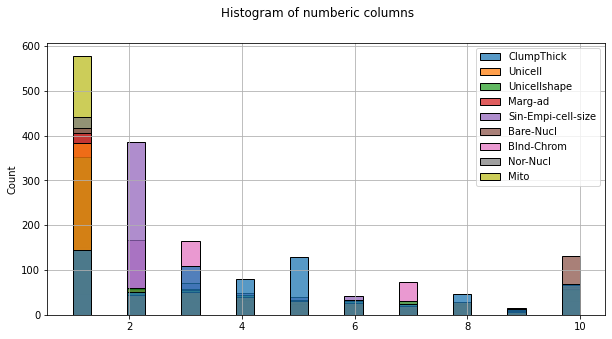

In [50]:
dfn = df2.iloc[0:,1:10]

plt.figure(figsize=(10,5))

plt.suptitle('Histogram of numberic columns')

sns.histplot(data=dfn,kde=False)

plt.grid()
plt.show()

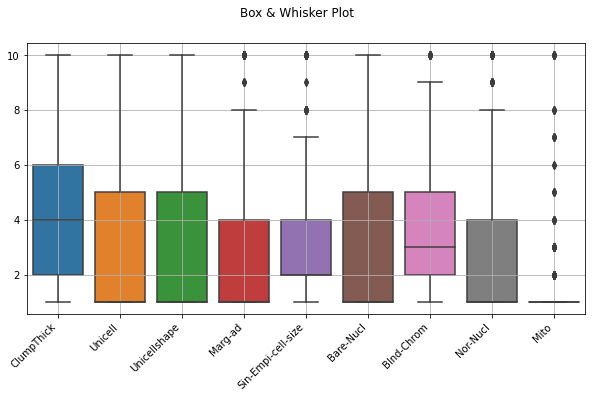

In [51]:
plt.figure(figsize=(10,5))
plt.suptitle('Box & Whisker Plot')
ax= sns.boxplot(data=dfn)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.grid()
plt.show()

Total Number of Sample :698

***count of benign and malignant***
2    457
4    241
Name: class, dtype: int64


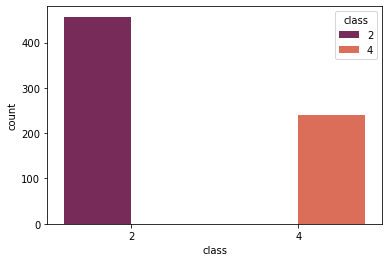

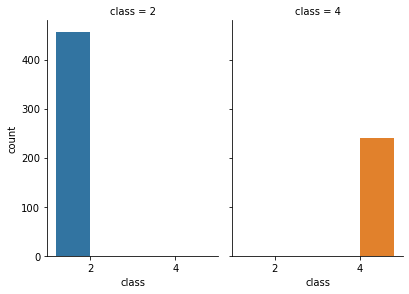

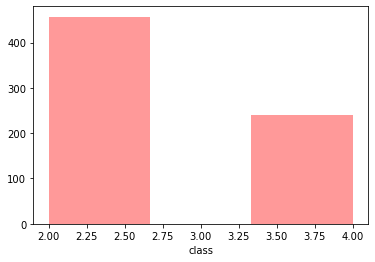

In [52]:
import warnings
warnings.filterwarnings("ignore")

print("Total Number of Sample :" +str(df['class'].count()))
print()
print("***count of benign and malignant***")
print(df['class'].value_counts())

ax = sns.countplot(x="class", hue="class", data=df,palette="rocket")
g = sns.catplot(x="class", hue="class", col="class",
                data=df2, kind="count",
                height=4, aspect=.7);

q2 = df [ df['class']=="2" ]
plt.figure()
sns.distplot(df['class'], bins=3,kde=False, color='r')
plt.show()

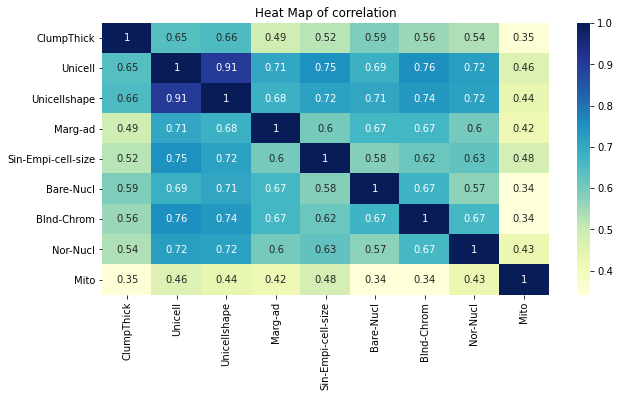

In [53]:
df.corr()
plt.figure(figsize=(10,5))
plt.title('Heat Map of correlation')
ax = sns.heatmap(dfn.corr(), annot=True, cmap="YlGnBu")
plt.show()


<AxesSubplot:>

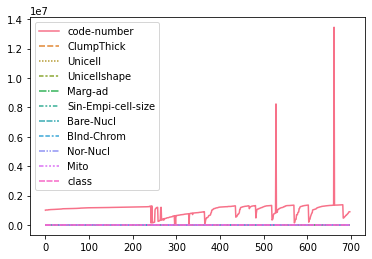

In [54]:
sns.lineplot(data=df)

# Model training

In [48]:
dff = pd.read_csv(url).replace('?',0)
x=dff.iloc[:,0:10].values
y=dff.iloc[:,10].values



In [49]:
#now splitng data into training and testing of data
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.3,random_state=0)



In [ ]:
# Model Training
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(train_x,train_y)

lg.score(train_x,train_y)

In [19]:
# Checking the distribution of target variable
df['class'].value_counts()

2    457
4    241
Name: class, dtype: int64

In [17]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=10 , random_state=707)
forest.fit(train_x,train_y)
forest.score(train_x,train_y)

0.9979508196721312

[Text(451.5394736842105, 1026.8, 'X[7] <= 3.5\ngini = 0.436\nsamples = 300\nvalue = [331, 157]'),
 Text(242.28947368421052, 906.0, 'X[3] <= 3.5\ngini = 0.176\nsamples = 210\nvalue = [314, 34]'),
 Text(132.1578947368421, 785.2, 'X[8] <= 7.5\ngini = 0.019\nsamples = 189\nvalue = [305, 3]'),
 Text(88.10526315789474, 664.4, 'X[4] <= 2.5\ngini = 0.007\nsamples = 188\nvalue = [305, 1]'),
 Text(44.05263157894737, 543.6, 'gini = 0.0\nsamples = 175\nvalue = [289, 0]'),
 Text(132.1578947368421, 543.6, 'X[3] <= 2.5\ngini = 0.111\nsamples = 13\nvalue = [16, 1]'),
 Text(88.10526315789474, 422.79999999999995, 'gini = 0.0\nsamples = 12\nvalue = [16, 0]'),
 Text(176.21052631578948, 422.79999999999995, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(176.21052631578948, 664.4, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(352.42105263157896, 785.2, 'X[4] <= 1.5\ngini = 0.349\nsamples = 21\nvalue = [9, 31]'),
 Text(264.3157894736842, 664.4, 'X[2] <= 2.5\ngini = 0.472\nsamples = 11\nvalue = [8, 13]'

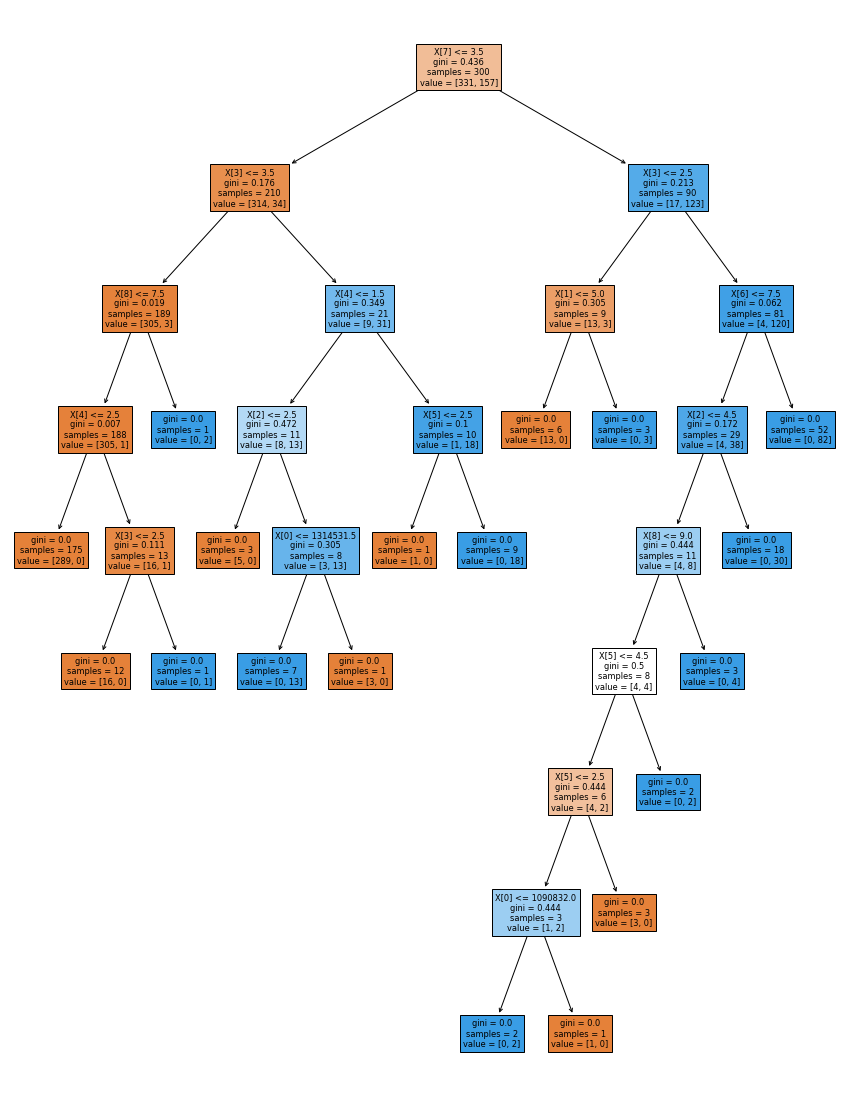

In [55]:
from sklearn import tree
plt.figure(figsize=(15,20))
tree.plot_tree(forest.estimators_[9],filled=True)

In [56]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier( criterion = 'entropy',random_state= 0)
tree.fit(train_x,train_y)
print(tree.score(train_x,train_y))

1.0


In [22]:
from sklearn.model_selection import cross_val_score
clf = RandomForestClassifier(n_estimators=10 , random_state=707)
# scores = cross_val_score(clf, train_x,train_y, cv=5)
# scores
clf.fit(train_x,train_y)
clf.score(train_x,train_y)

0.9979508196721312

In [57]:
from sklearn.feature_selection import SelectKBest 
from sklearn.feature_selection import chi2
bf = SelectKBest(score_func=chi2, k=10)
fit = bf.fit(train_x,train_y)
fit

SelectKBest(score_func=<function chi2 at 0x000001F9F0BF0CA0>)

In [23]:
# Building a Predictive system
input_data=(1002945,5,4,4,5,7,10,3,2,1)

# values are in tuple ,will convert it into numpy arrays
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting one data array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=clf.predict(input_data_reshaped)
print(prediction)

[2]


In [30]:
if (prediction[0]==2):
    print("Breast Cancer is Malignant")
else:
    print("Breast Cancer is Benign")

Breast Cancer is Malignant


In [31]:
# Saving the Trained Model

import pickle
filename='trained.pkl'
pickle.dump(clf,open(filename,'wb'))

In [32]:
# Loading the saved model

loaded_model=pickle.load(open('trained.pkl','rb'))

In [33]:
input_data=(1002945,5,4,4,5,7,10,3,2,1)

# values are in tuple ,will convert it into numpy arrays
input_data_as_numpy_array=np.asarray(input_data)

# reshape the numpy array as we are predicting one data array
input_data_reshaped=input_data_as_numpy_array.reshape(1,-1)

prediction=loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==2):
    print("Breast Cancer is Malignant")
else:
    print("Breast Cancer is Benign")

[2]
Breast Cancer is Malignant
